In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier




In [2]:
df = pd.read_csv("train.csv")

#Part 1

print(df.info())
print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

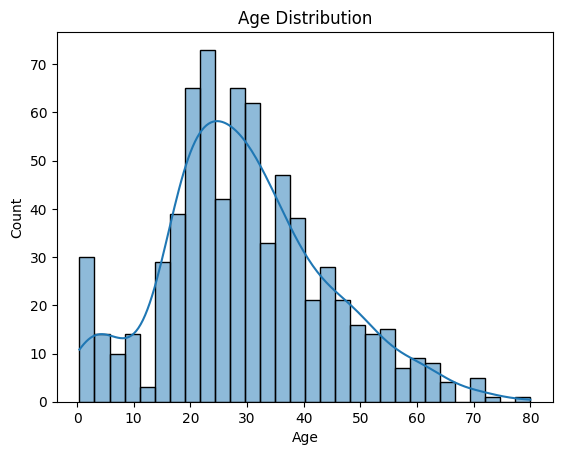

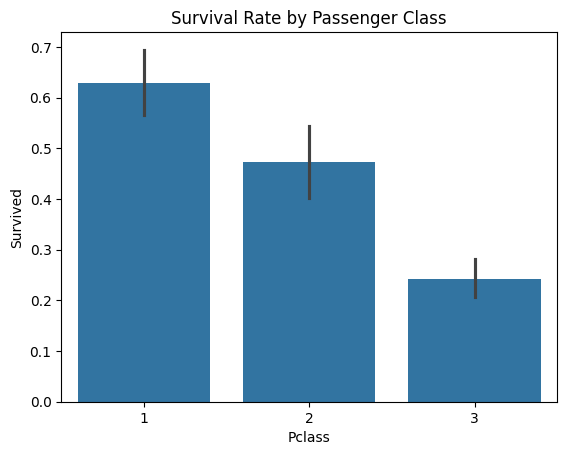

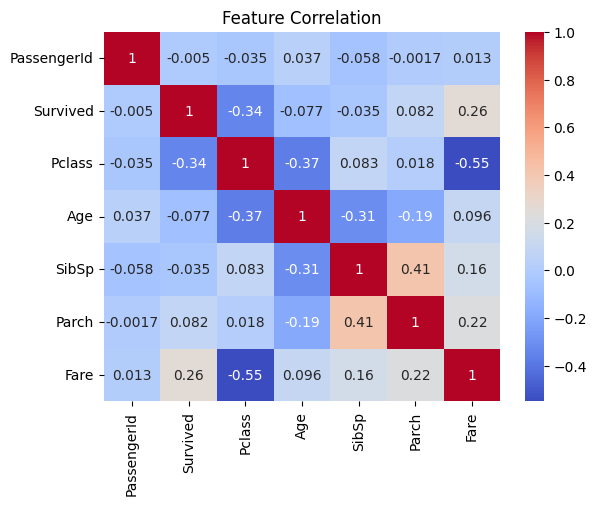

In [3]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [4]:
# Part 2
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


title_age_map = df.groupby('Title')['Age'].median()
df['Age'] = df.apply(lambda row: title_age_map[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)


df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))


most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)


if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Part 3
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

def categorize_age(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeCategory'] = df['Age'].apply(categorize_age)

def categorize_family(size):
    if size == 1:
        return 'Single'
    elif size <= 3:
        return 'Small Family'
    else:
        return 'Large Family'

df['FamilyCategory'] = df['FamilySize'].apply(categorize_family)


In [6]:
# Part 4
categorical_features = ['Sex', 'Embarked', 'Pclass', 'FamilyCategory', 'AgeCategory']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [7]:
# Part 5
features = [col for col in df.columns if col not in ['Survived', 'Name', 'Ticket', 'Title']]
target = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

dot_data = export_graphviz(clf, out_file=None, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")


|--- Sex_male <= 0.50
|   |--- Pclass_3 <= 0.50
|   |   |--- PassengerId <= 301.00
|   |   |   |--- PassengerId <= 285.50
|   |   |   |   |--- Fare <= 29.39
|   |   |   |   |   |--- Fare <= 28.23
|   |   |   |   |   |   |--- Age <= 28.00
|   |   |   |   |   |   |   |--- Parch <= 1.00
|   |   |   |   |   |   |   |   |--- Fare <= 11.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Fare >  11.75
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Parch >  1.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  28.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  28.23
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  29.39
|   |   |   |   |   |--- class: 1
|   |   |   |--- PassengerId >  285.50
|   |   |   |   |--- class: 0
|   |   |--- PassengerId >  301.00
|   |   |   |--- Fare <= 143.59
|   |   |   |   |--- class: 1
|   |   |   |--- Fare > 

'decision_tree.pdf'